# MODEL DEVELOPMENT

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings       
warnings.filterwarnings("ignore")

In [3]:
ml_data = pd.read_csv("ml_data.csv")
ml_data.head()

,PostalAbbr,Democrat,Republican,ub,PST045214,PST120214,AGE135214,AGE295214,AGE775214,SEX255214,...,SBO001207,SBO315207,SBO115207,SBO415207,SBO015207,WTN220207,RTN131207,LND110210,POP060210,winner
0,0.695652,1501.0,2229.0,ABBEVILLE COUNTY,24965,-1.8,5.4,21.5,19.4,51.5,...,1385,19.1,0.0,0.0,33.4,0,2841,490.48,51.8,1
1,0.606557,1862.0,3148.0,ACADIA PARISH,62486,1.2,7.1,26.7,13.5,51.5,...,4289,0.0,0.0,1.4,25.4,0,8808,655.12,94.3,1
2,0.736842,1789.0,2973.0,ACCOMACK COUNTY,33021,-0.4,6.0,20.9,21.3,51.3,...,2944,6.0,0.0,0.0,23.1,59400,7749,449.50,73.8,1
3,1.000000,0.0,43421.0,ADA COUNTY,426236,8.6,6.2,25.1,12.6,49.9,...,42344,0.4,1.0,2.1,25.4,6006918,15720,1052.58,372.8,1
4,1.000000,0.0,44164.0,ADAMS COUNTY,3861,-2.9,4.2,17.0,24.9,48.5,...,492,0.0,0.0,0.0,18.1,0,5627,1363.06,2.9,1


In [4]:
y = ml_data['winner']
x = ml_data.drop(['winner','Democrat','Republican','ub'],axis=1)

### Standard Scaling

In [5]:
X = ml_data.drop(['Democrat','Republican','ub','winner'],axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_std = scaler.fit_transform(X)


### Min-Max Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_norm = scaler.fit_transform(X)

### Principal component analysis

In [7]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
pca = PCA(n_components = 25)
pca.fit(X_std)
x_pca = pca.transform(X_std)
x_pca.shape

(2767, 25)

In [8]:
ml_data.shape

(2767, 39)

### splitting data into test and train

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

# Display the shape of training and testing data
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (2213, 35)
y_train shape:  (2213,)
x_test shape:  (554, 35)
y_test shape:  (554,)


# Model Development

##### In this study we are going to try different ML models and choosing the best efficient model suitable for prediction. We are using classification methods like Logistic Regression, KNN, Random Forest classifier,etc. of supervised learning technique.


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Model 1: Logistic regression

### *Before scaling and pca*

In [11]:
#creating an instance
loR_model = LogisticRegression(solver='lbfgs', max_iter=1000)

#fitting model on train data
loR_model.fit(x_train,y_train)

y_pred = loR_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.16      0.27       194
           1       0.68      0.97      0.80       360

    accuracy                           0.69       554
   macro avg       0.71      0.57      0.54       554
weighted avg       0.70      0.69      0.62       554



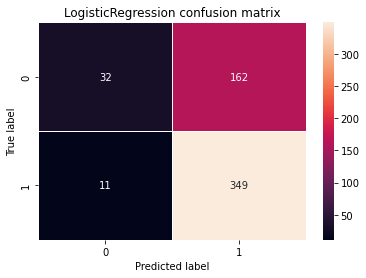

In [12]:
lr=confusion_matrix(y_test,y_pred)
sns.heatmap(lr, annot = True, fmt="d", linewidths=.5, cbar = True)
plt.title('LogisticRegression confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

### *Model evaluation after standardisation*

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_std,y,random_state=42,test_size=0.2)

In [14]:
loR_model = LogisticRegression()
loR_model.fit(x_train,y_train)

y_pred = loR_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       194
           1       0.85      0.90      0.87       360

    accuracy                           0.83       554
   macro avg       0.82      0.80      0.81       554
weighted avg       0.83      0.83      0.83       554



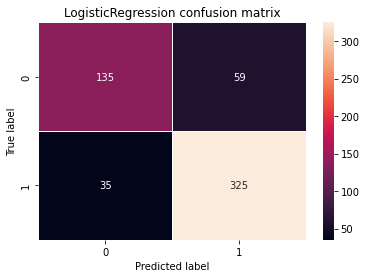

In [15]:
lr=confusion_matrix(y_test,y_pred)
sns.heatmap(lr, annot = True, fmt="d", linewidths=.5, cbar = True)
plt.title('LogisticRegression confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

##### Note:
After standardisation accuracy increases from 0.69 to 0.83 so standardisation has significant role in our model.

### *after min max scaling*

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_norm,y,random_state=42,test_size=0.2)

In [17]:
loR_model = LogisticRegression()
loR_model.fit(x_train,y_train)
y_pred = loR_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.68      0.74       194
           1       0.84      0.91      0.87       360

    accuracy                           0.83       554
   macro avg       0.82      0.80      0.81       554
weighted avg       0.83      0.83      0.83       554



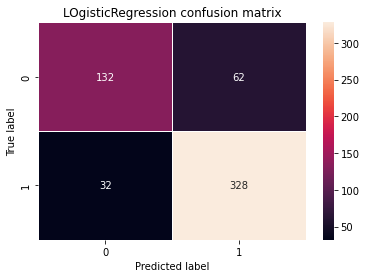

In [18]:
lr=confusion_matrix(y_test,y_pred)
sns.heatmap(lr, annot = True, fmt="d", linewidths=.5, cbar = True)
plt.title('LOgisticRegression confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

##### Note:
Accuracy score increases after min max scaling similiar to standardisation (0.83). now let's try pca.

### *After PCA*

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,random_state=42,test_size=0.2)

In [20]:
loR_model = LogisticRegression()
loR_model.fit(x_train,y_train)
y_pred = loR_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       194
           1       0.86      0.90      0.88       360

    accuracy                           0.84       554
   macro avg       0.83      0.81      0.82       554
weighted avg       0.84      0.84      0.84       554



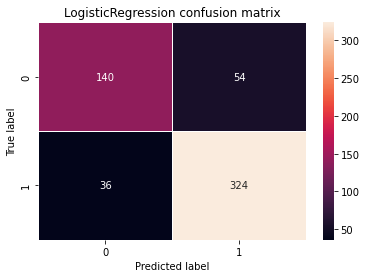

In [21]:
lr=confusion_matrix(y_test,y_pred)
sns.heatmap(lr, annot = True, fmt="d", linewidths=.5, cbar = True)
plt.title('LogisticRegression confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

##### Note:
 after pca accuracy score is 0.84.

## Model 2: Random Forest Classifier

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [23]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       194
           1       0.85      0.90      0.88       360

    accuracy                           0.83       554
   macro avg       0.82      0.81      0.81       554
weighted avg       0.83      0.83      0.83       554



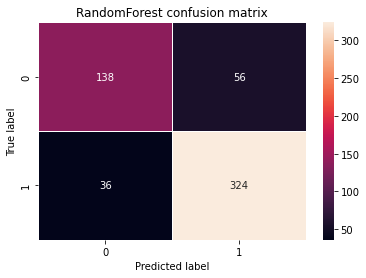

In [25]:
rf=confusion_matrix(y_test,y_pred)
sns.heatmap(rf, annot = True, fmt="d", linewidths=.5, cbar = True)
plt.title('RandomForest confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Note:
Accuracy score is 0.84 for Random Forest model. let us check accuracy after standardising.

### *after standardisation*

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_std,y,random_state=42,test_size=0.2)

In [27]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       194
           1       0.85      0.89      0.87       360

    accuracy                           0.83       554
   macro avg       0.82      0.81      0.81       554
weighted avg       0.83      0.83      0.83       554



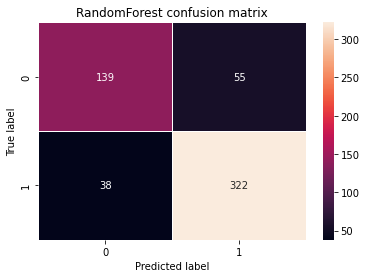

In [28]:
rf=confusion_matrix(y_test,y_pred)
sns.heatmap(rf, annot = True, fmt="d", linewidths=.5, cbar = True)
plt.title('RandomForest confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Note:
there is no change in accuracy of model after standardisation (0.85).

### *After min max scaling*

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_norm,y,random_state=42,test_size=0.2)

In [30]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       194
           1       0.85      0.90      0.87       360

    accuracy                           0.83       554
   macro avg       0.82      0.80      0.81       554
weighted avg       0.83      0.83      0.83       554



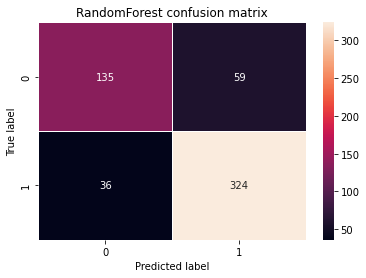

In [31]:
rf=confusion_matrix(y_test,y_pred)
sns.heatmap(rf, annot = True, fmt="d", linewidths=.5, cbar = True)
plt.title('RandomForest confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Note:
accuracy score becomes 0.84 after min max scaling.

### *After PCA*

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,random_state=42,test_size=0.2)

In [33]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71       194
           1       0.83      0.91      0.87       360

    accuracy                           0.82       554
   macro avg       0.81      0.78      0.79       554
weighted avg       0.82      0.82      0.81       554



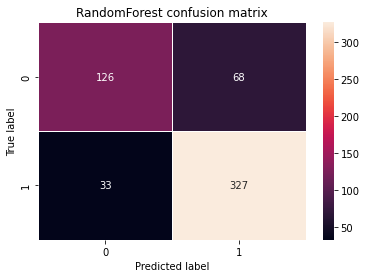

In [34]:
rf=confusion_matrix(y_test,y_pred)
sns.heatmap(rf, annot = True, fmt="d", linewidths=.5, cbar = True)
plt.title('RandomForest confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Note:
After pca accuracy score again decreases to 0.82.

## Model 3: K-nearest neighbor

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [36]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    Classifier.fit(x_train, y_train)
    y_pred = Classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [37]:
acc_values

[0.6534296028880866,
 0.6101083032490975,
 0.6678700361010831,
 0.644404332129964,
 0.6768953068592057,
 0.6714801444043321,
 0.6588447653429603,
 0.6588447653429603,
 0.6696750902527075,
 0.6588447653429603,
 0.6714801444043321,
 0.6750902527075813]

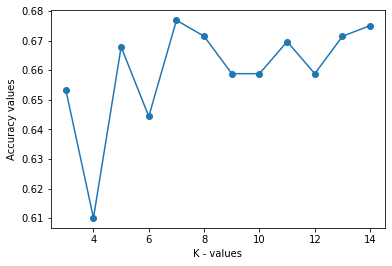

In [38]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show() 

In [39]:
Classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski')
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.27      0.37       194
           1       0.69      0.90      0.78       360

    accuracy                           0.68       554
   macro avg       0.64      0.58      0.58       554
weighted avg       0.66      0.68      0.64       554



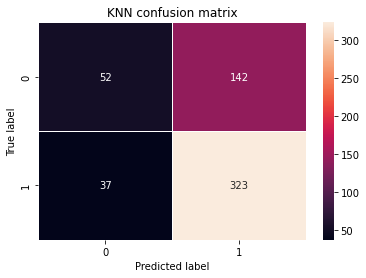

In [40]:
kn=confusion_matrix(y_test,y_pred)
sns.heatmap(kn, annot = True, fmt="d", linewidths=.5, cbar = True)
plt.title('KNN confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Note:
accuracy score is 0.68 for KNN model.

### *Model evaluation after standardisation*

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_std,y,random_state=42,test_size=0.2)

In [42]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    Classifier.fit(x_train, y_train)
    y_pred = Classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)
    acc_values

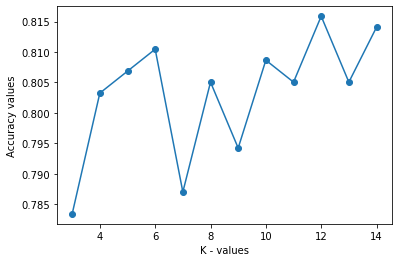

In [43]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show() 

In [44]:
Classifier = KNeighborsClassifier(n_neighbors=12, metric='minkowski')
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.64      0.71       194
           1       0.82      0.91      0.87       360

    accuracy                           0.82       554
   macro avg       0.81      0.78      0.79       554
weighted avg       0.81      0.82      0.81       554



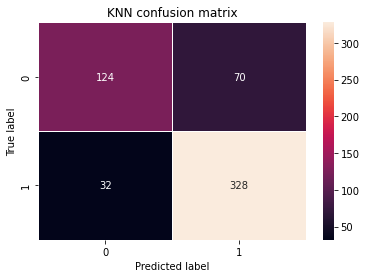

In [45]:
kn=confusion_matrix(y_test,y_pred)
sns.heatmap(kn, annot = True, fmt="d", linewidths=.5, cbar = True)
plt.title('KNN confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Note:
After standardisation model has an increased accuracy of 0.82

### *After min-max scaling*

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_norm,y,random_state=42,test_size=0.2)


In [47]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    Classifier.fit(x_train, y_train)
    y_pred = Classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

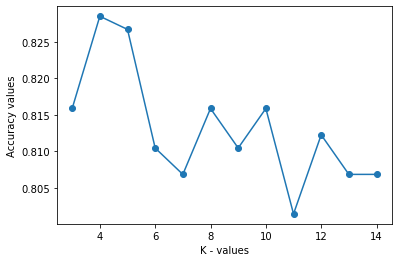

In [48]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show() 

In [49]:
Classifier = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       194
           1       0.87      0.86      0.87       360

    accuracy                           0.83       554
   macro avg       0.81      0.81      0.81       554
weighted avg       0.83      0.83      0.83       554



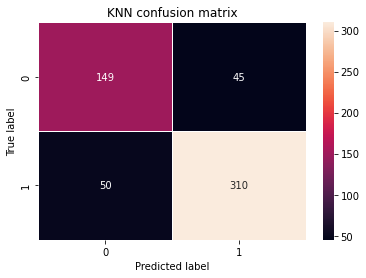

In [50]:
kn=confusion_matrix(y_test,y_pred)
sns.heatmap(kn, annot = True, fmt="d", linewidths=.5, cbar = True)
plt.title('KNN confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Note:
After min max scaling model has increased accuracy score of 0.83.

### *After PCA*

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,random_state=42,test_size=0.2)

In [52]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    Classifier.fit(x_train, y_train)
    y_pred = Classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)
    acc_values

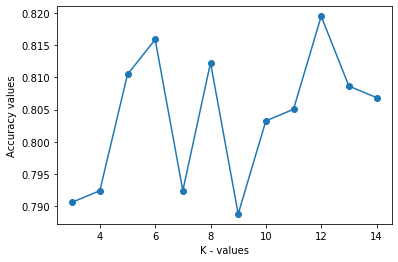

In [53]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show() 

In [54]:
Classifier = KNeighborsClassifier(n_neighbors=12, metric='minkowski')
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.64      0.71       194
           1       0.82      0.92      0.87       360

    accuracy                           0.82       554
   macro avg       0.82      0.78      0.79       554
weighted avg       0.82      0.82      0.81       554



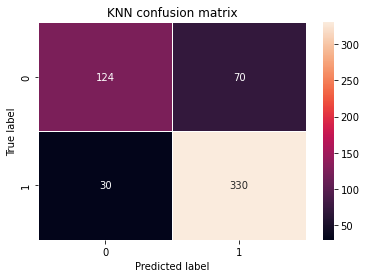

In [55]:
kn=confusion_matrix(y_test,y_pred)
sns.heatmap(kn, annot = True, fmt="d", linewidths=.5, cbar = True)
plt.title('KNN confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Note:
There is not much difference from normalisation even after doing pca (accuracy_score = 0.82)

In [57]:
data = {'without scaling and pca':[0.69, 0.84,0.68],
       'after standardisation':[0.83, 0.85,0.82],
       'after normalisation':[0.83, 0.84,0.83],
       'after std. and pca':[0.84, 0.82,0.82]
       }
 
# Creating pandas DataFrame.
df = pd.DataFrame(data, index =['Logistic Regression',
                                'Random Forest classifier',
                               'k-nearest neighbor'])
 
# printing the data
df

,without scaling and pca,after standardisation,after normalisation,after std. and pca
Logistic Regression,0.69,0.83,0.83,0.84
Random Forest classifier,0.84,0.85,0.84,0.82
k-nearest neighbor,0.68,0.82,0.83,0.82


#### Findings:
So from above models it is clear that Random Forest Classifier has comparatively high accuracy_score of 0.85 after standardising features. we have to improve the performance of model by fine tuning.

In [58]:
#gradient boosting
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
f1_score(y_test, y_pred)

0.8678237650200268

In [59]:
#extreme Gradient boosting

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
f1_score(y_test, y_pred)

[15:17:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8710990502035278

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [209]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [67]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [68]:
# Using the random grid searching for best hyperparameters
# creating the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2)
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   3.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [69]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [70]:
rf_random.best_score_

-0.1671777167196102

In [71]:
y_pred=rf_random.predict(x_test)

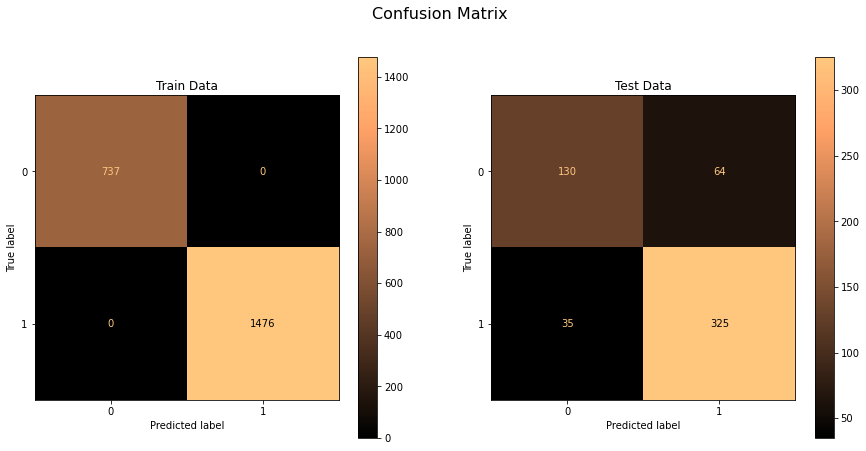

In [75]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
# Predicting training and testing labels

y_train_pred_count = rf.predict(x_train)
y_test_pred_count = rf.predict(x_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
from sklearn.metrics import plot_confusion_matrix  
plot_confusion_matrix(estimator=rf, X=x_train, y_true=y_train, values_format='.5g',cmap='copper', ax=ax1)
plot_confusion_matrix(estimator=rf, X=x_test, y_true=y_test, values_format='.5g',cmap='copper', ax=ax2)
ax1.set_title(label='Train Data', size=12)
ax2.set_title(label='Test Data', size=12)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [77]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       737
           1       1.00      1.00      1.00      1476

    accuracy                           1.00      2213
   macro avg       1.00      1.00      1.00      2213
weighted avg       1.00      1.00      1.00      2213

                    Testing Report           
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       194
           1       0.84      0.90      0.87       360

    accuracy                           0.82       554
   macro avg       0.81      0.79      0.80       554
weighted avg       0.82      0.82      0.82       554



In [64]:
# Necessary imports
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]
             }

# Instantiating Random Forest classifier
rf=RandomForestClassifier()

# Instantiating RandomizedSearchCV object
rf_cv = RandomizedSearchCV(rf, param_dist, cv = 5)

rf_cv.fit(x, y)

# Print the tuned parameters and score
print("Tuned RandomForest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))


Tuned RandomForest Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 5}
Best score is 0.855437684830364


In [63]:
# Necessary imports
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]
             }

# Instantiating Random Forest classifier
rf=RandomForestClassifier()

# Instantiating RandomizedSearchCV object
rf_cv = RandomizedSearchCV(rf, param_dist, cv = 5)

rf_cv.fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 2}
Best score is 0.8310123285292585
